# Exam Score Prediction Dataset - EDA and Data Cleaning
This notebook performs intermediate-level exploratory data analysis (EDA) and basic data cleaning (missing values handling and categorical encoding).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display options
pd.set_option('display.max_columns', None)

# Load dataset
file_path = r"Exam_Score_Prediction.csv"  # adjust if needed
df = pd.read_csv(file_path)

print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (20000, 13)


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,200.99,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,200.99,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,200.99,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,200.99,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,200.99,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [2]:
# Basic info
print("Data Types and Non-Null Counts:")
print(df.info())

print("\nDescriptive Statistics (Numeric Columns):")
display(df.describe())

print("\nDescriptive Statistics (Object Columns):")
display(df.describe(include='object'))

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  float64
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 2.0+ MB
None

Descriptive Statistics (Numeric Columns):


,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.500000,20.473300,4.007604,70.017365,7.00856,62.513225
std,5770.211372,2.284458,2.308313,17.282262,1.73209,18.908491
min,200.990000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,19800.010000,24.000000,7.910000,99.400000,9.90000,100.000000



Descriptive Statistics (Object Columns):


,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
count,20000,20000,20000,20000,20000,20000,20000
unique,3,7,2,3,5,3,3
top,other,bca,yes,average,self-study,medium,moderate
freq,6726,2902,16988,6694,4079,6760,9878


In [3]:
# Missing values check
print("Missing values per column:")
missing_values = df.isna().sum().sort_values(ascending=False)
display(missing_values)

# Percentage of missing values
print("\nPercentage of missing values per column:")
missing_percentage = (df.isna().mean() * 100).sort_values(ascending=False)
display(missing_percentage)

Missing values per column:


student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64


Percentage of missing values per column:


student_id          0.0
age                 0.0
gender              0.0
course              0.0
study_hours         0.0
class_attendance    0.0
internet_access     0.0
sleep_hours         0.0
sleep_quality       0.0
study_method        0.0
facility_rating     0.0
exam_difficulty     0.0
exam_score          0.0
dtype: float64

In [4]:
# Duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates dropped. New shape:", df.shape)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


In [5]:
# Separate numerical and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['student_id', 'age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']
Categorical Columns: ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']


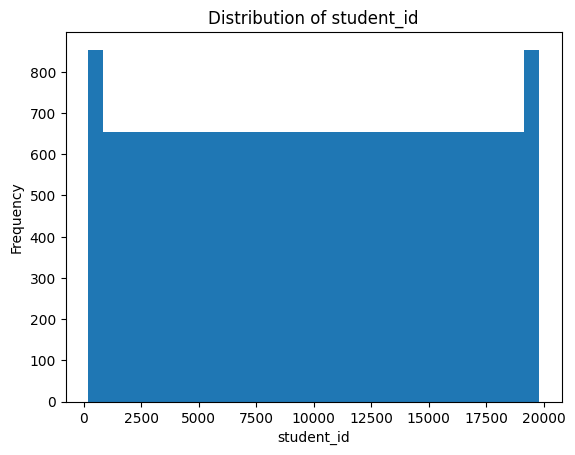

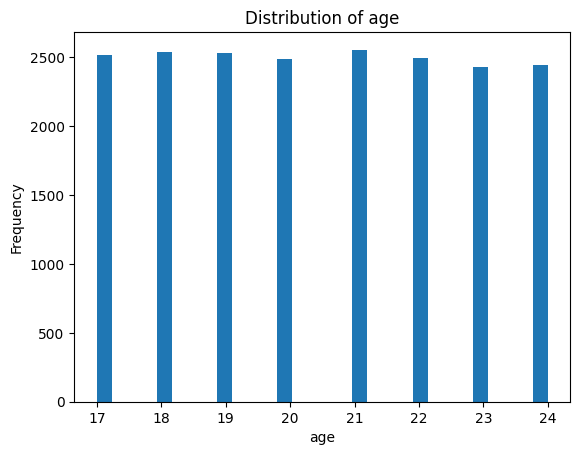

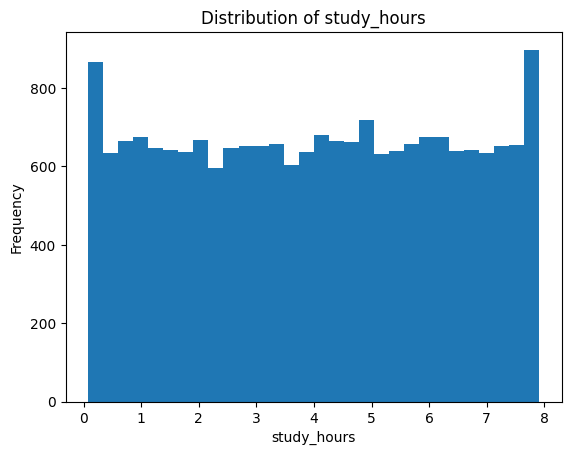

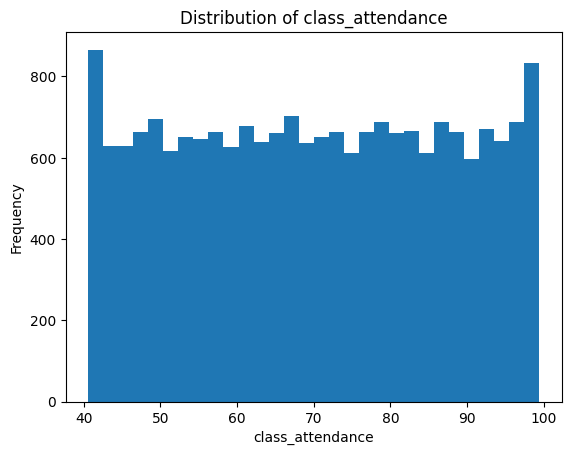

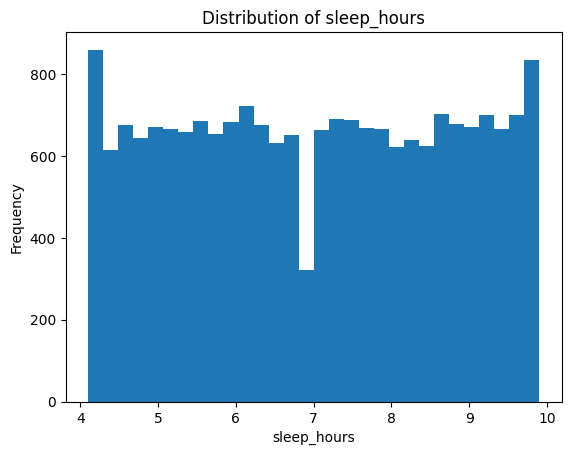

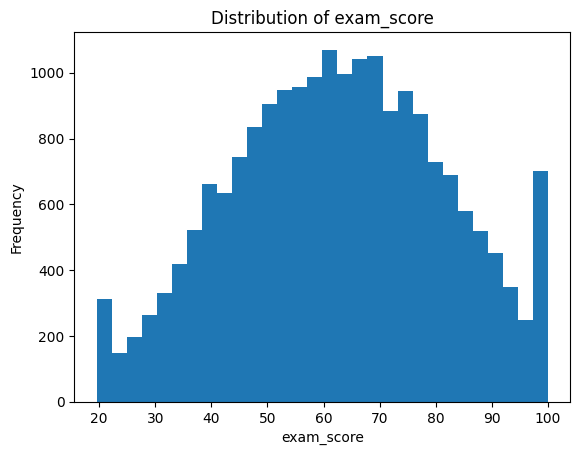

In [6]:
# Histograms for numerical columns
for col in numeric_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [7]:
# Value counts for categorical columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts(dropna=False))


Value counts for gender:


gender
other     6726
male      6695
female    6579
Name: count, dtype: int64


Value counts for course:


course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64


Value counts for internet_access:


internet_access
yes    16988
no      3012
Name: count, dtype: int64


Value counts for sleep_quality:


sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64


Value counts for study_method:


study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64


Value counts for facility_rating:


facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64


Value counts for exam_difficulty:


exam_difficulty
moderate    9878
easy        6141
hard        3981
Name: count, dtype: int64

Correlation Matrix:


,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
student_id,1.000000,-0.002545,0.002129,0.001104,-0.000575,0.003267
age,-0.002545,1.000000,0.002955,0.008449,-0.000385,0.006522
study_hours,0.002129,0.002955,1.000000,-0.001645,-0.004533,0.717788
class_attendance,0.001104,0.008449,-0.001645,1.000000,0.007187,0.308850
sleep_hours,-0.000575,-0.000385,-0.004533,0.007187,1.000000,0.133222
exam_score,0.003267,0.006522,0.717788,0.308850,0.133222,1.000000


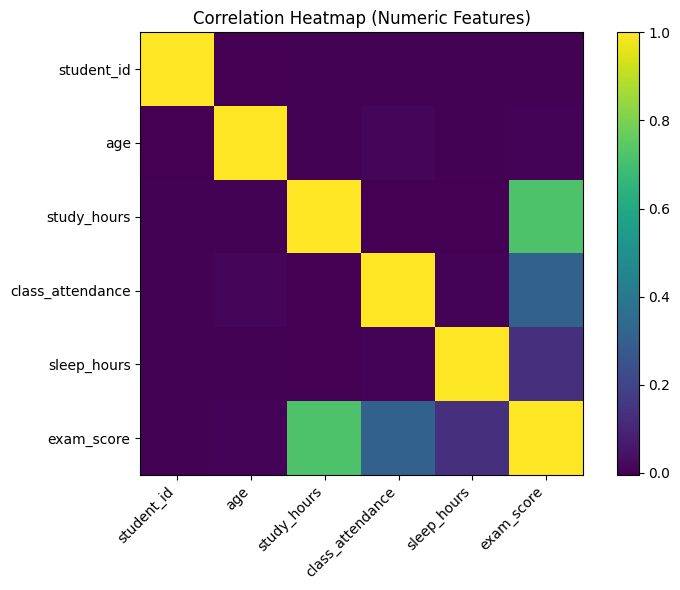

In [8]:
# Correlation matrix (only numeric)
corr_matrix = df[numeric_cols].corr()
print("Correlation Matrix:")
display(corr_matrix)

# Simple correlation heatmap using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, interpolation='nearest')
plt.title("Correlation Heatmap (Numeric Features)")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.colorbar()
plt.tight_layout()
plt.show()

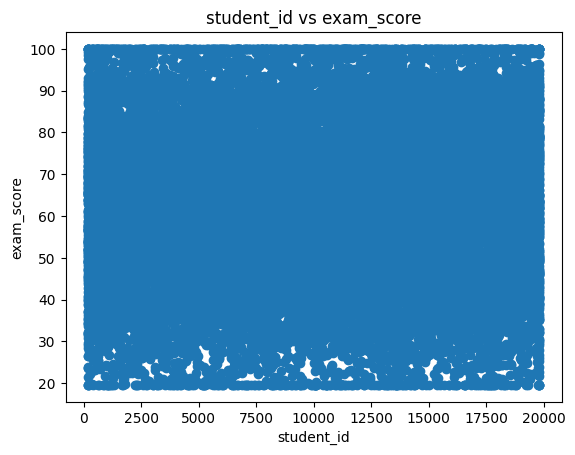

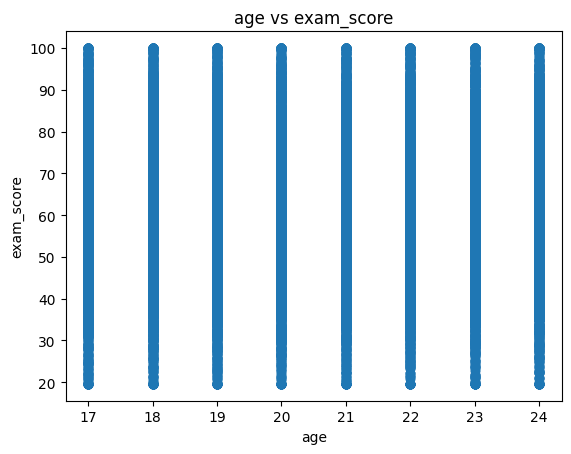

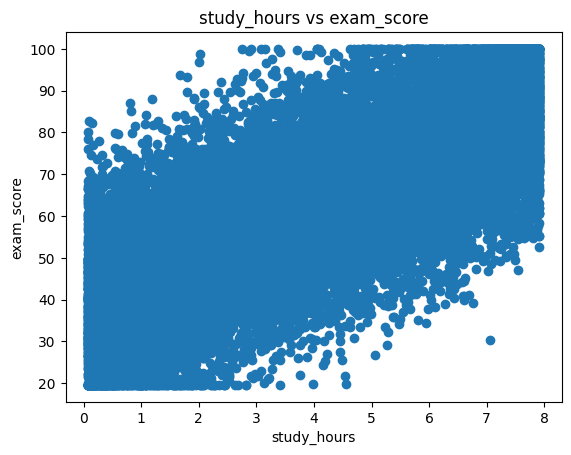

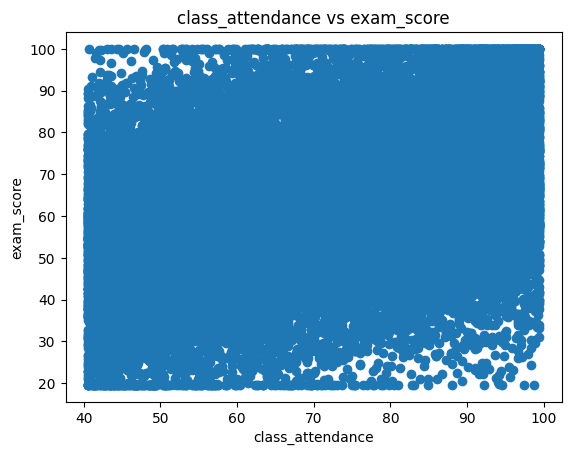

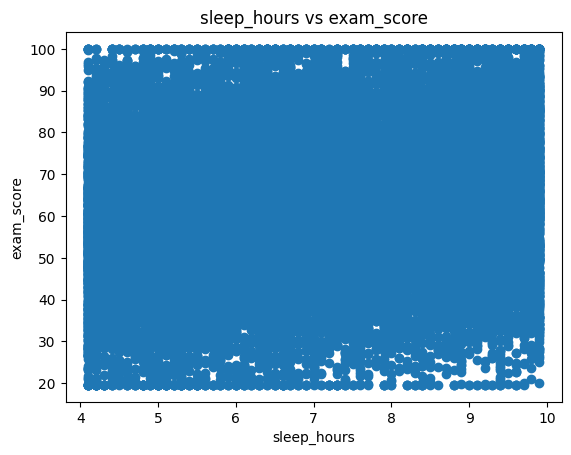

In [9]:
# Boxplots of numerical columns against exam_score (if present)
target_col = 'exam_score'
if target_col in df.columns:
    for col in numeric_cols:
        if col == target_col:
            continue
        plt.figure()
        plt.scatter(df[col], df[target_col])
        plt.title(f"{col} vs {target_col}")
        plt.xlabel(col)
        plt.ylabel(target_col)
        plt.show()
else:
    print("Target column 'exam_score' not found in dataset.")

In [10]:
# Data Cleaning - Standardize categorical text (lowercase, strip spaces)
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

print("Sample after standardizing categorical columns:")
df.head()

Sample after standardizing categorical columns:


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,200.99,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,200.99,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,200.99,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,200.99,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,200.99,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [12]:
# Handling missing values

# Fill numeric columns with median
for col in numeric_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Fill categorical columns with mode
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

print("Missing values after imputation:")
display(df.isna().sum())

Missing values after imputation:


C:\Users\USER\AppData\Local\Temp\ipykernel_12100\652088275.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12100\652088275.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [13]:
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape before encoding:", df.shape)
print("Shape after encoding:", df_encoded.shape)
df_encoded.head()

Shape before encoding: (20000, 13)
Shape after encoding: (20000, 25)


,student_id,age,study_hours,class_attendance,sleep_hours,exam_score,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,internet_access_yes,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,200.99,17,2.78,92.9,7.4,58.9,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,True,False
1,200.99,23,3.37,64.8,4.6,54.8,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,True
2,200.99,22,7.88,76.8,8.5,90.3,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True
3,200.99,20,0.67,48.4,5.8,29.7,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,True,False,False,True
4,200.99,20,0.89,71.6,9.8,43.7,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,True


In [14]:
# Save cleaned and encoded dataset
output_path = "Exam_Score_Prediction_cleaned_encoded.csv"
df_encoded.to_csv(output_path, index=False)
print(f"Cleaned and encoded dataset saved to: {output_path}")

Cleaned and encoded dataset saved to: Exam_Score_Prediction_cleaned_encoded.csv
